In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR 

In [2]:
df=pd.read_csv("Position_Salaries.csv")
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes


In [4]:
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [5]:
x = df[['Level']].values
y=df['Salary'].values 

In [8]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_y = StandardScaler()

x_scaled = sc_x.fit_transform(x)
y_scaled = sc_y.fit_transform(y.reshape(-1, 1)).ravel()

In [10]:
from sklearn.svm import SVR

svr_rbf = SVR(kernel='rbf')
svr_rbf.fit(x_scaled, y_scaled)

SVR()

In [12]:
level = np.array([[6.5]])
level_scaled = sc_x.transform(level)
salary_scaled_pred = svr_rbf.predict(level_scaled)
salary_pred = sc_y.inverse_transform(salary_scaled_pred.reshape(-1, 1))
print("Predicted salary for level 6.5:", salary_pred[0,0])

Predicted salary for level 6.5: 170370.02040650236


C:\Users\husna\AppData\Local\Temp\ipykernel_8644\2437058904.py:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X) + 0.1, 0.1).reshape(-1,1)


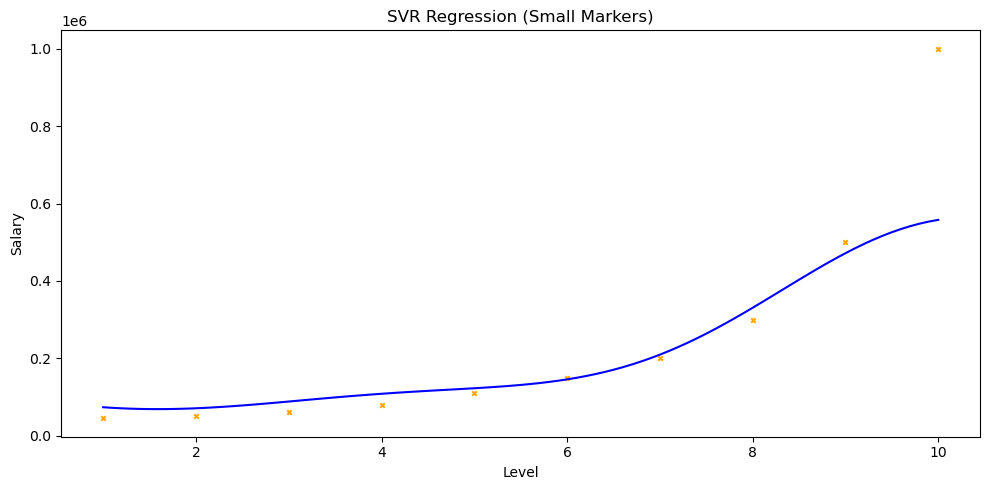

Predicted salary: 170370.02040650236


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("Position_Salaries.csv")

# Split into X and y
X = df[['Level']].values
y = df['Salary'].values

# Scaling X and y
sc_X = StandardScaler()
sc_y = StandardScaler()

# Fit FIRST, then transform
X_scaled = sc_X.fit_transform(X)
y_scaled = sc_y.fit_transform(y.reshape(-1,1)).ravel()

# SVR model (RBF kernel)
svr_rbf = SVR(kernel='rbf')
svr_rbf.fit(X_scaled, y_scaled)

# Smooth curve
X_grid = np.arange(min(X), max(X) + 0.1, 0.1).reshape(-1,1)
X_grid_scaled = sc_X.transform(X_grid)

# Predictions
y_pred_scaled = svr_rbf.predict(X_grid_scaled)
y_pred = sc_y.inverse_transform(y_pred_scaled.reshape(-1,1))

# Plot
plt.figure(figsize=(10,5))
plt.scatter(X, y, color='orange', s=10, marker='x')
plt.plot(X_grid, y_pred, color='blue')
plt.xlabel("Level")
plt.ylabel("Salary")
plt.title("SVR Regression (Small Markers)")
plt.tight_layout()
plt.show()

# Predict new value
level = np.array([[6.5]])
level_scaled = sc_X.transform(level)         # this is SAFE now
salary_scaled_pred = svr_rbf.predict(level_scaled)
salary_pred = sc_y.inverse_transform(salary_scaled_pred.reshape(-1,1))

print("Predicted salary:", salary_pred[0,0])
